# Lecture 19:
- `Image Gradients and Edge Detection`

- **Image Gradients:**`An image gradient is a directional change in the intensity or the teller inside the image. We use image gradients inside the image to find the edges inside an image. There are several image gradient methods available in open CV and we are going to see three of them first is:`
<br>

- Laplacian derivatives 
- Sobel X method 
- Sobel Y method

<br>





In [2]:

import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 


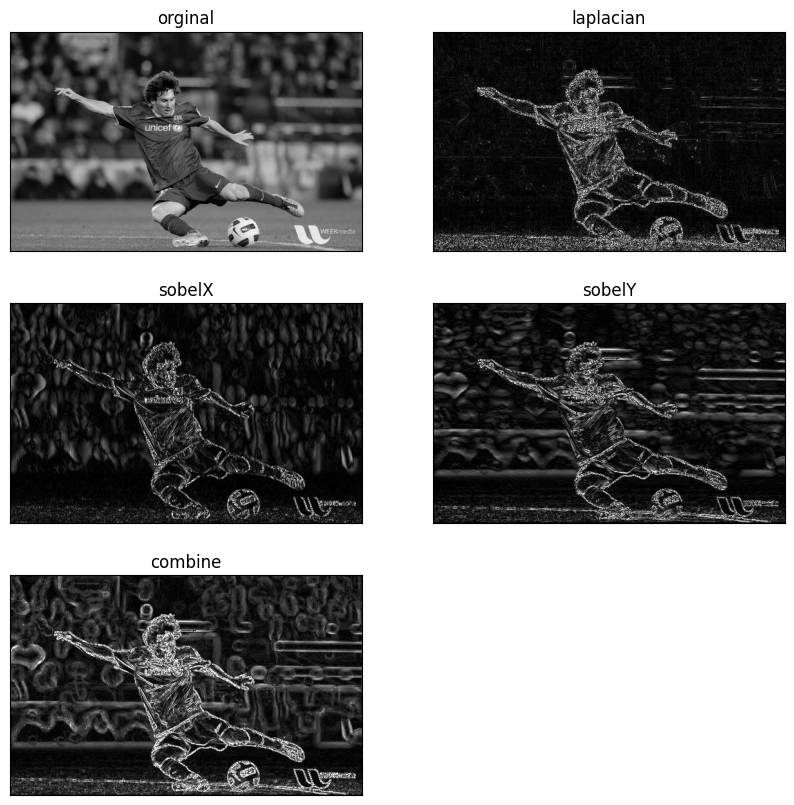

In [18]:

img = cv.imread('data/messi5.jpg',cv.IMREAD_GRAYSCALE)



# ______________________ Laplacian Derivatives __________________

'''
CV.CV_64F is just a data type and we are using a 64 bit float due to the negative slope
induced by transforming the image from white to black.
So, you just need to keep in mind that this is just a data type which is 64 bit float and it supports
the negative numbers which we will be dealing with when that laplacian method is run on our image
'''
laplacian = cv.Laplacian(img,cv.CV_64F,ksize=3) # ksize should be odd

'''
We are going to take the absolute value of our laplacian image transformation and 
we are going to convert this value back to the unsigned 8-bit integer which is suitable for our output

'''
laplacian = np.uint8(np.absolute(laplacian))

# sobelX
sobelX = cv.Sobel(img,cv.CV_64F,1,0) # order of x, order of y for sobelX x = 1
sobelX = np.uint8(np.absolute(sobelX))

# sobelY
sobelY = cv.Sobel(img,cv.CV_64F,0,1) # for sobelY y = 1
sobelY = np.uint8(np.absolute(sobelY))
 
# combine sobelX and sobelY

combine = cv.bitwise_or(sobelX,sobelY)

# ______________________________ Output ______________________________

labels = ["orginal","laplacian","sobelX","sobelY","combine"]
images = [img,laplacian,sobelX,sobelY,combine]

plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[i])
    plt.imshow(images[i],'gray')

if cv.waitKey(0) == ord('q'):
    cv.destroyAllWindows()